In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import skimage.io
import librosa
import librosa.display
import seaborn

In [7]:
# os modulunu kullanmayı öğrenelim
# bulunduğu dizine yeni bir klasör ekler
# klasör mevcut ise hata dödürür.
try:
    os.makedirs("newFile") 
except:
    print("klasör ismi mevcut")


klasör ismi mevcut


In [12]:
# İSLETİM SİSTEMİ BİLGİSİNİ GERİ DONDURUR
isletimSistemi = os.name 
print(isletimSistemi)

nt


In [13]:
dizinBilgisi = os.getcwd()
print(dizinBilgisi)

C:\Users\D4rkS\Desktop\UrbanSoundClassification


In [16]:
#dizini değiştirme
#"../.." iki üst klasöre geçmeye yarar.
os.chdir(r"C:\Users\D4rkS\Desktop\UrbanSoundClassification")
dizinBilgisi = os.getcwd()
print(dizinBilgisi)

C:\Users\D4rkS\Desktop\UrbanSoundClassification


In [17]:
# dizindeki diğer klasörleri ve dosyaların isimlerini listeler
print(os.listdir())

['.ipynb_checkpoints', 'creatingDataFolder.ipynb', 'newClasor', 'UrbanSound8K']


In [21]:
for file in os.listdir("urbanSound8K/audio"): #dosyaları dolaşmak
    print(file)   #file.endwith(".py") ile dosya sonunun py ile bitenleri secebiliriz

.DS_Store
fold1
fold10
fold2
fold3
fold4
fold5
fold6
fold7
fold8
fold9


In [22]:
os.system("notepad.exe") # os.system metodu ile istediğimiz bir programı çalıştırabiliriz..

0

In [23]:
try:
    os.rename("newDirectory","yeniklasor") # mevcut klasörün ismini değiştirme 
except:
    print("dosya bulunamadı")

dosya bulunamadı


In [24]:
try:
    os.rmdir("newDirectory")
except:
    print("silinecek dosya bulunamadı")

silinecek dosya bulunamadı


In [27]:
# tam, mutlak konumu almak için 
try:
    x = os.path.abspath("urbanSound8K")
except:
    print("dosya bulunamadı")

In [28]:
x

'C:\\Users\\D4rkS\\Desktop\\UrbanSoundClassification\\urbanSound8K'

In [2]:
import shutil
urbanPath = r"C:\\Users\\D4rkS\\Desktop\\UrbanSoundClassification\\urbanSound8K\audio"
urbanPathCSV = r"C:\\Users\\D4rkS\\Desktop\\UrbanSoundClassification\\urbanSound8K\\metadata"

In [63]:
os.listdir(urbanPath)
    

['.DS_Store',
 'fold1',
 'fold10',
 'fold2',
 'fold3',
 'fold4',
 'fold5',
 'fold6',
 'fold7',
 'fold8',
 'fold9']

In [3]:
data = pd.read_csv(urbanPathCSV+"\\UrbanSound8K.csv")
dataInfo = pd.DataFrame(data)
dataInfo.head()
dataInfo.info()
dataInfo = dataInfo.drop(["start","end","fsID","salience","classID"],axis=1)
dataInfo.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


,slice_file_name,fold,class
0,100032-3-0-0.wav,5,dog_bark
1,100263-2-0-117.wav,5,children_playing
2,100263-2-0-121.wav,5,children_playing
3,100263-2-0-126.wav,5,children_playing
4,100263-2-0-137.wav,5,children_playing
5,100263-2-0-143.wav,5,children_playing
6,100263-2-0-161.wav,5,children_playing
7,100263-2-0-3.wav,5,children_playing
8,100263-2-0-36.wav,5,children_playing
9,100648-1-0-0.wav,10,car_horn


In [4]:

audio_path_fold = r"C:\\Users\\D4rkS\\Desktop\\UrbanSoundClassification\\urbanSound8K\\audio\\fold"
new_class_path = r"C:\\Users\\D4rkS\\Desktop\\UrbanSoundClassification\\urbanSound8K\audio\\"
#os.makedirs(new_class_path+"myfolder")
os.path.exists(new_class_path+"\audio")

False

In [138]:
path_dome = "C:\\Users\\D4rkS\\Desktop\\UrbanSoundClassification\\urbanSound8K\\audio"
for i,(a,b,c) in enumerate(os.walk(path_dome)): #(dirpath, dirnames, filenames).
    print(f"values : i={i} a:{a} b:{b} c:{c}\n")

values : i=0 a:C:\Users\D4rkS\Desktop\UrbanSoundClassification\urbanSound8K\audio b:['fold1', 'fold10', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9'] c:['.DS_Store', '.png', 'new.png', 'newx.png', 'x.png']

values : i=1 a:C:\Users\D4rkS\Desktop\UrbanSoundClassification\urbanSound8K\audio\fold1 b:[] c:['.DS_Store', '101415-3-0-2.wav', '101415-3-0-3.wav', '101415-3-0-8.wav', '102106-3-0-0.wav', '102305-6-0-0.wav', '102842-3-0-1.wav', '102842-3-1-0.wav', '102842-3-1-5.wav', '102842-3-1-6.wav', '103074-7-0-0.wav', '103074-7-0-1.wav', '103074-7-0-2.wav', '103074-7-1-0.wav', '103074-7-1-1.wav', '103074-7-1-2.wav', '103074-7-1-3.wav', '103074-7-1-4.wav', '103074-7-1-5.wav', '103074-7-1-6.wav', '103074-7-2-0.wav', '103074-7-3-0.wav', '103074-7-3-1.wav', '103074-7-3-2.wav', '103074-7-3-3.wav', '103074-7-4-0.wav', '103074-7-4-1.wav', '103074-7-4-2.wav', '103074-7-4-3.wav', '103074-7-4-4.wav', '103074-7-4-5.wav', '103074-7-4-6.wav', '103258-5-0-0.wav', '103258-5-0-1.wav'

(20, 173)


C:\Users\D4rkS\AppData\Local\Temp/ipykernel_3724/3296438049.py:7: FutureWarning: Pass y=[-0.0222085  -0.03995341 -0.01813935 ...  0.04497256 -0.030632
 -0.03453902] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_feature = librosa.feature.mfcc(sound,sr=sr)
C:\Users\D4rkS\AppData\Local\Temp/ipykernel_3724/3296438049.py:8: FutureWarning: Pass y=[-0.0222085  -0.03995341 -0.01813935 ...  0.04497256 -0.030632
 -0.03453902] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_spect = librosa.feature.melspectrogram(sound,sr=sr)


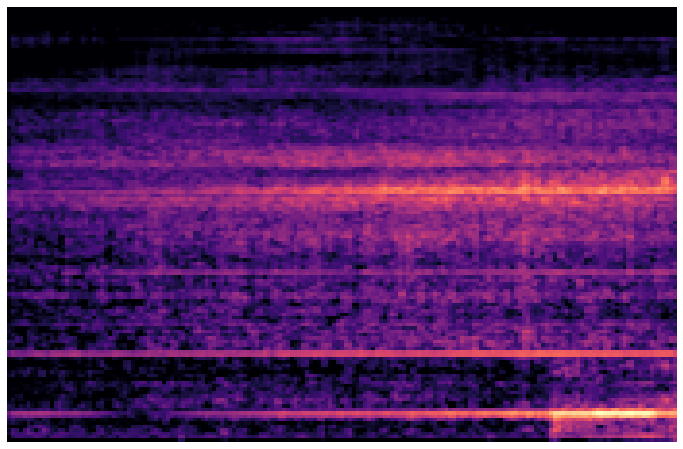

In [19]:
# creating mfcc spectrum
import librosa
import librosa.display
import seaborn
sr = 22050
sound,sr = librosa.load(new_class_path+"\\fold6\\14114-4-0-1.wav",sr=sr)
mfcc_feature = librosa.feature.mfcc(sound,sr=sr)
mfcc_spect = librosa.feature.melspectrogram(sound,sr=sr)

fig,ax = plt.subplots(1,figsize=(12,8))
mels_spec = librosa.amplitude_to_db(mfcc_spect,ref=np.max)
mfcc_figure = librosa.display.specshow(mels_spec,sr=sr,ax=ax,y_axis="linear")
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
ax.set_xlabel(None)
ax.set_ylabel(None)
fig.savefig(new_class_path+"new_spect")
print(mfcc_feature.shape)
#seaborn.heatmap(mfcc_feature)
#plt.close(fig)


8732

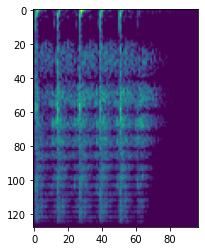

In [21]:
def scale_minmax(inputs, min=0.0, max=1.0):
    inputs_scaled = (inputs - inputs.min()) / (inputs.max() - inputs.min())
    inputs_scaled = inputs_scaled * (max - min) + min
    return inputs_scaled

sr = 22050
hop_length=512
mel_filters=13
time_steps=256
sound,sr = librosa.load(new_class_path+"\\fold1\\7061-6-0-0.wav",sr=sr)
mels = librosa.feature.melspectrogram(y=sound,
                                      sr=sr,
                                      n_fft=hop_length*2,
                                      hop_length=hop_length)
mels_spec = librosa.amplitude_to_db(mels,ref=np.max)
#mels = np.log(mels+1e-10) # adding small number to avoid log(0)
img = scale_minmax(mels_spec,0,255).astype(np.uint8) # 8 bits range 0-255 
img = np.flip(img,axis=0)
skimage.io.imsave(new_class_path+"newx.png",img)
plt.imshow(mels_spec)
len(dataInfo)

In [1]:
urbanPath = r"C:\\Users\\D4rkS\\Desktop\\UrbanSoundClassification\\urbanSound8K\\audio"

def scale_minmax(inputs, min=0.0, max=1.0):
    inputs_scaled = (inputs - inputs.min()) / (inputs.max() - inputs.min())
    inputs_scaled = inputs_scaled * (max - min) + min
    return inputs_scaled
# Burayı çalıştırmak için fonksiyonu iptal edip içerisindeki scripti ayrı bir hücrede çalıştırın
def create_mfcc():
    
    sr = 22050
    hop_length=512
    mel_filters=13
    rang = len(dataInfo)

    for i in range(rang):
        file_name = dataInfo.loc[i][0]
        fold_name = dataInfo.loc[i][1]
        class_name = dataInfo.loc[i][2] 
        for folder in os.listdir(urbanPath):
            if(("fold"+str(fold_name))==(folder)):
                for audio_files in os.listdir(audio_path_fold+f"{fold_name}"):
                    if(file_name==audio_files):
                        if(os.path.exists(new_class_path+f"{class_name}")==True):

                            sound,sr = librosa.load(new_class_path+f"fold{fold_name}\\{file_name}",sr=sr)
                            mfcc_spect = librosa.feature.melspectrogram(sound,sr=sr)

                            fig,ax = plt.subplots(1,figsize=(12,8))
                            mels_spec = librosa.amplitude_to_db(mfcc_spect,ref=np.max)
                            mfcc_figure = librosa.display.specshow(mels_spec,sr=sr,ax=ax,y_axis="linear")
                            ax.axes.get_xaxis().set_visible(False)
                            ax.axes.get_yaxis().set_visible(False)
                            ax.set_frame_on(False)
                            ax.set_xlabel(None)
                            ax.set_ylabel(None)
                            plt.show()
                            fig.savefig(new_class_path+f"{class_name}"+"\\"+f"{file_name}.png")
                            plt.close(fig)
                        else:
                            os.makedirs(new_class_path+f"{class_name}")
                            sound,sr = librosa.load(new_class_path+f"fold{fold_name}\\{file_name}",sr=sr)
                            mfcc_spect = librosa.feature.melspectrogram(sound,sr=sr)

                            fig,ax = plt.subplots(1,figsize=(12,8))
                            mels_spec = librosa.amplitude_to_db(mfcc_spect,ref=np.max)
                            mfcc_figure = librosa.display.specshow(mels_spec,sr=sr,ax=ax,y_axis="linear")
                            ax.axes.get_xaxis().set_visible(False)
                            ax.axes.get_yaxis().set_visible(False)
                            ax.set_frame_on(False)
                            ax.set_xlabel(None)
                            ax.set_ylabel(None)
                            plt.show()
                            fig.savefig(new_class_path+f"{class_name}"+"\\"+f"{file_name}.png")
                            plt.close(fig)
